### Required libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### DATASET

In [66]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/student-performance")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Rishab\.cache\kagglehub\datasets\whenamancodes\student-performance\versions\2


In [67]:
import pandas as pd

mat = pd.read_excel("../data/Maths.xlsx")
por = pd.read_excel("../data/Portuguese.xlsx")

print(mat.head())
print(por.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

### Merging Both DATASETS

In [68]:
df = pd.concat([mat, por], axis=0)
df.reset_index(drop=True, inplace=True)

df.shape

(1048, 33)

### Column For PASS

In [69]:
df["pass"] = (df["G3"] >= 10).astype(int)
df = df.drop(["G3"], axis=1)


In [70]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1048 non-null   object
 1   sex         1048 non-null   object
 2   age         1048 non-null   int64 
 3   address     1048 non-null   object
 4   famsize     1048 non-null   object
 5   Pstatus     1048 non-null   object
 6   Medu        1048 non-null   int64 
 7   Fedu        1048 non-null   int64 
 8   Mjob        1048 non-null   object
 9   Fjob        1048 non-null   object
 10  reason      1048 non-null   object
 11  guardian    1048 non-null   object
 12  traveltime  1048 non-null   int64 
 13  studytime   1048 non-null   int64 
 14  failures    1048 non-null   int64 
 15  schoolsup   1048 non-null   object
 16  famsup      1048 non-null   object
 17  paid        1048 non-null   object
 18  activities  1048 non-null   object
 19  nursery     1048 non-null   object
 20  higher  

In [72]:
### Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)


### EDA

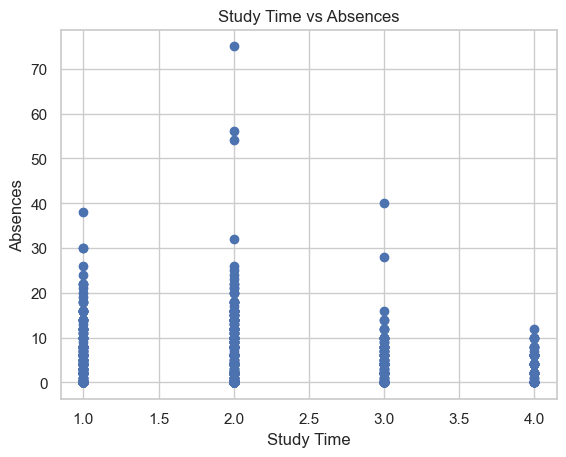

In [73]:
# Exploratory Data Analysis (EDA)
plt.figure()
plt.scatter(df["studytime"], df["absences"])
plt.xlabel("Study Time")
plt.ylabel("Absences")
plt.title("Study Time vs Absences")
plt.show()

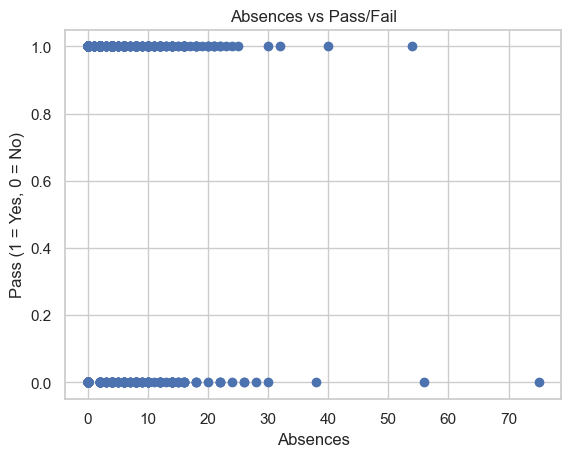

In [74]:
plt.figure()
plt.scatter(df["absences"], df["pass"])
plt.xlabel("Absences")
plt.ylabel("Pass (1 = Yes, 0 = No)")
plt.title("Absences vs Pass/Fail")
plt.show()


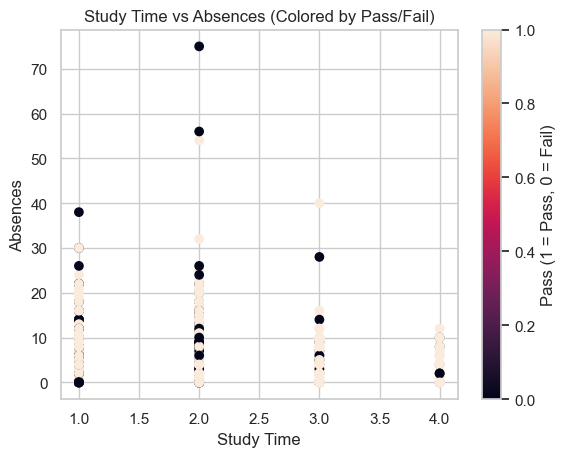

In [75]:
plt.figure()
sc = plt.scatter(
    df["studytime"],
    df["absences"],
    c=df["pass"]
)

plt.xlabel("Study Time")
plt.ylabel("Absences")
plt.title("Study Time vs Absences (Colored by Pass/Fail)")

plt.colorbar(sc, label="Pass (1 = Pass, 0 = Fail)")
plt.show()


In [76]:
### Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop("pass", axis=1)
y = df["pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (838, 41)
Test set size: (210, 41)


In [77]:
### Train a logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Model Evaluation

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8952380952380953
[[ 42  15]
 [  7 146]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        57
           1       0.91      0.95      0.93       153

    accuracy                           0.90       210
   macro avg       0.88      0.85      0.86       210
weighted avg       0.89      0.90      0.89       210



In [79]:
### Save the trained model using pickle
import pickle

pickle.dump(model, open("../model/logistic_model.pkl", "wb"))


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [81]:
### Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
    "class_weight": [None, "balanced"]
}


In [82]:

log_reg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)


In [83]:
### Run grid search
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Rishab\Documents\Student Performance\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Rishab\Documents\Student Performance\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


In [84]:
model = grid.best_estimator_

y_pred_tuned = model.predict(X_test)

from sklearn.metrics import classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Accuracy: 0.8952380952380953
[[ 43  14]
 [  8 145]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.80        57
           1       0.91      0.95      0.93       153

    accuracy                           0.90       210
   macro avg       0.88      0.85      0.86       210
weighted avg       0.89      0.90      0.89       210



In [85]:
### Save the tuned model using pickle
import pickle

pickle.dump(model, open("../model/logistic_tuned.pkl", "wb"))


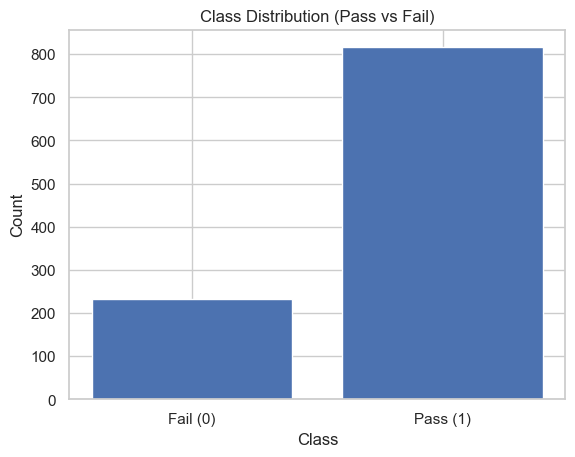

In [86]:
### Plot class distribution
import matplotlib.pyplot as plt

plt.figure()
plt.bar(["Fail (0)", "Pass (1)"], df["pass"].value_counts().sort_index())
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Pass vs Fail)")
plt.show()


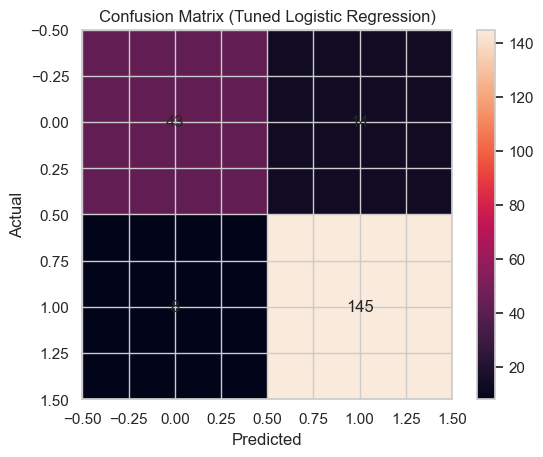

In [87]:
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix (Tuned Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

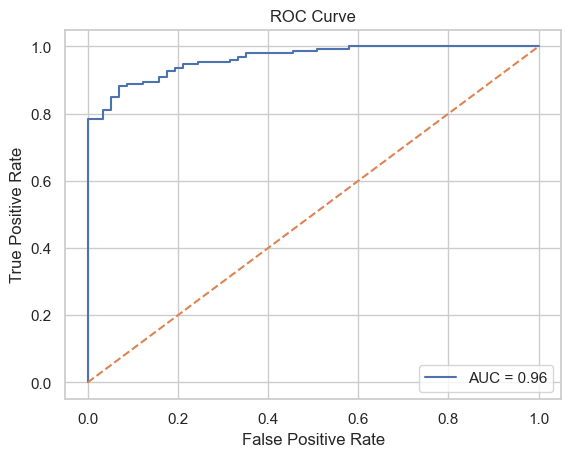

In [88]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


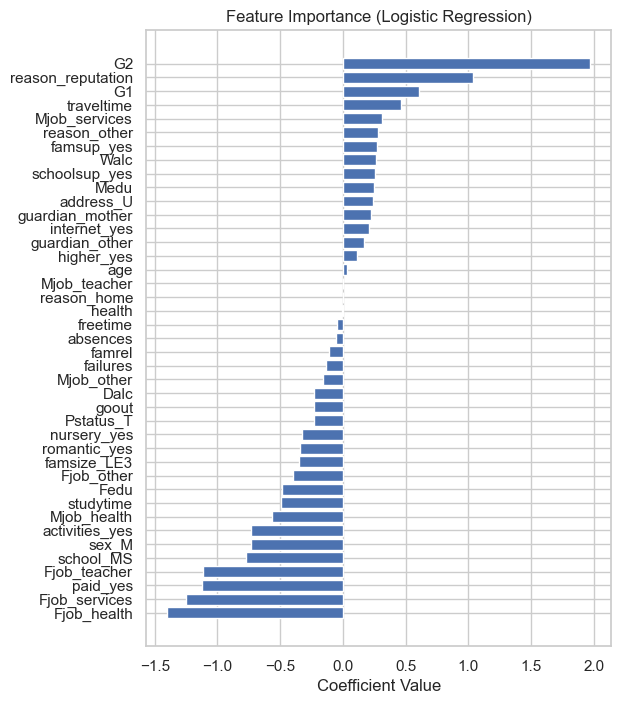

In [89]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coef_df = coef_df.sort_values(by="Coefficient")

plt.figure(figsize=(6, 8))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

In [90]:
# Select only deployment features
deploy_features = ["studytime", "absences", "failures"]

X_deploy = df[deploy_features]
y = df["pass"]


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_deploy, y, test_size=0.2, random_state=42
)

deploy_model = LogisticRegression(max_iter=1000)
deploy_model.fit(X_train, y_train)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [93]:
y_pred_deploy = deploy_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_deploy))
print(confusion_matrix(y_test, y_pred_deploy))
print(classification_report(y_test, y_pred_deploy))

Accuracy: 0.7428571428571429
[[ 11  46]
 [  8 145]]
              precision    recall  f1-score   support

           0       0.58      0.19      0.29        57
           1       0.76      0.95      0.84       153

    accuracy                           0.74       210
   macro avg       0.67      0.57      0.57       210
weighted avg       0.71      0.74      0.69       210



In [92]:
import pickle

pickle.dump(deploy_model, open("../model/logistic_deploy.pkl", "wb"))


In [125]:
DEPLOY_FEATURES = [
    "age",
    "studytime",
    "failures",
    "absences",
    "Medu",
    "Fedu",
    "traveltime",
    "Dalc",
    "Walc",
    "health"
]



In [121]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

X = df[DEPLOY_FEATURES]
y = df["pass"]

X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2,random_state=42,stratify=y)


In [126]:
pipeline = Pipeline(
    steps=[
        ("model", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            random_state=42
        ))
    ]
)


In [127]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
pickle.dump(pipeline,open("../model/logistic_pipeline.pkl", "wb"))


Accuracy: 0.7714285714285715

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.37      0.41        46
           1       0.83      0.88      0.86       164

    accuracy                           0.77       210
   macro avg       0.65      0.63      0.64       210
weighted avg       0.75      0.77      0.76       210

